In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [2]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [5]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

In [6]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

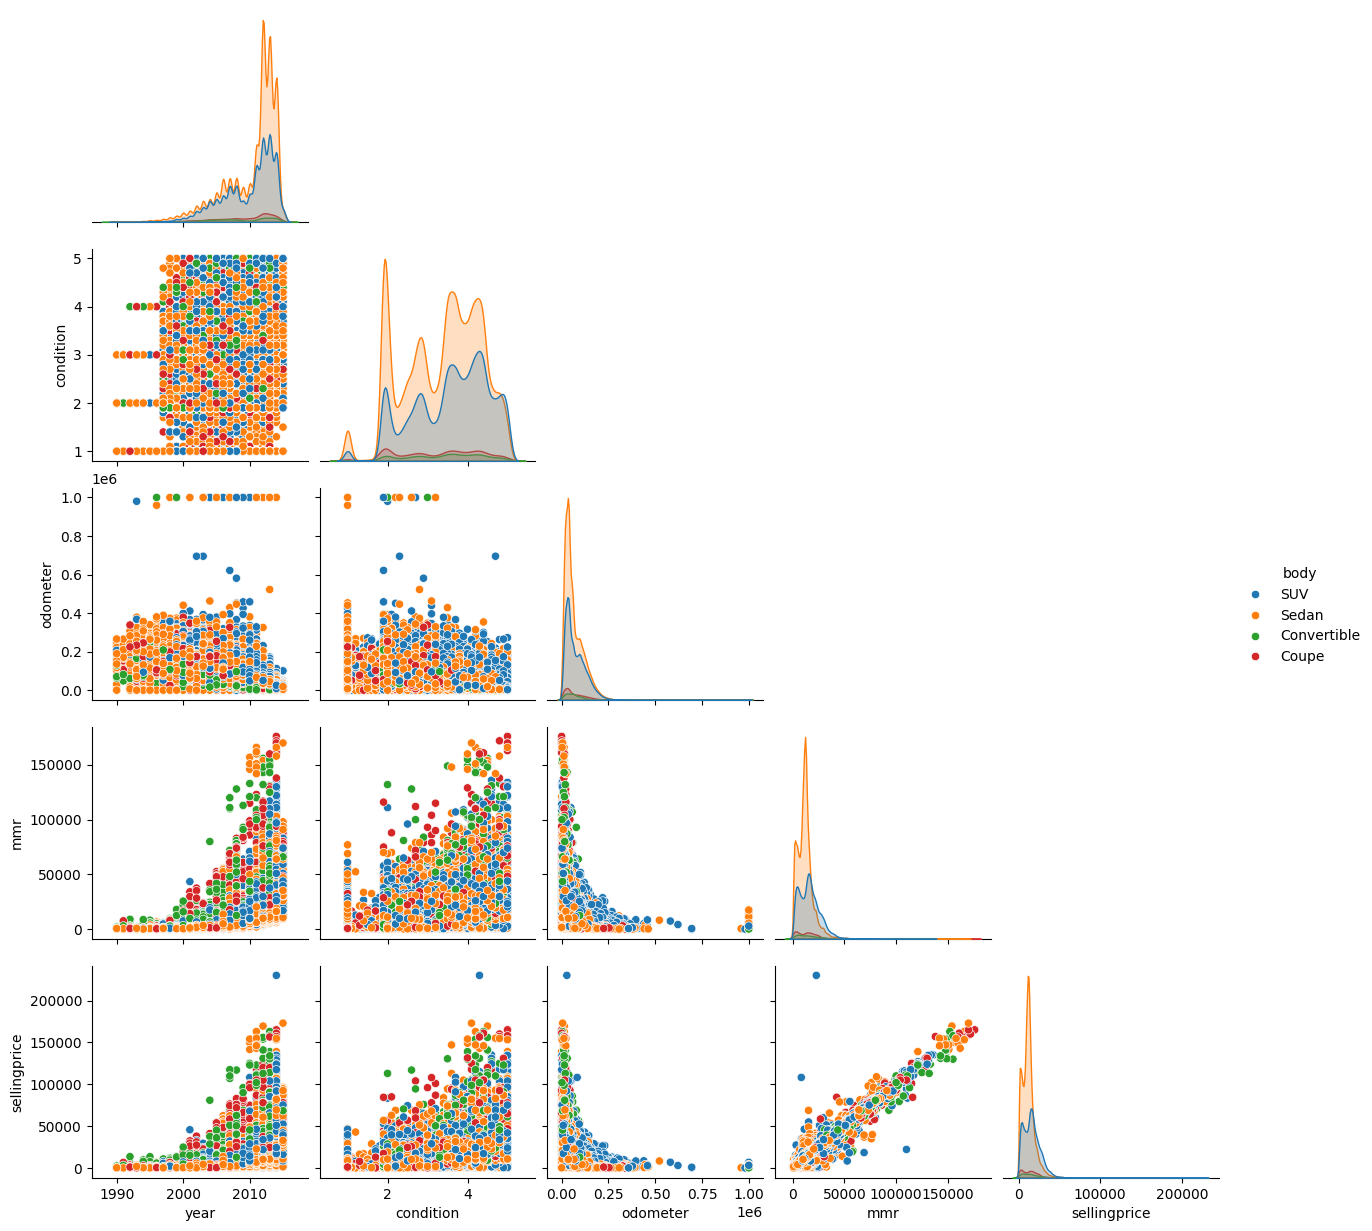

In [7]:
sns.pairplot(
    data=cars.loc[cars["body"].isin(style_list)],
    corner=True,
    hue="body",
    vars=cars.select_dtypes(include=["int64", "float64"]).columns
)

- There's a strong relationship between mmr and selling price indicating that the mmr is usually chosen very well.
- There's a strong negative relationship between mmr/selling price and year, which makes sense. Younger cars are more expensive
- There appears to be a relationship between condition and price. The better the condition, the better the price, although this relationship is not as strong as I anticipated with a lot of outliers at condition=1. Perhaps it might be worth exploring this data further.
- Surprisingly, there doesn't appear to be a relationship between year and odometer
- There doesn't appear to be a relationship between condition and and year
- Finally, Coupes and Convertible appear to the most expensive bodies, whereas SUVs are in the low to medium range. Sedans are found all over the spectrum

In [8]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]


#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


<Axes: >

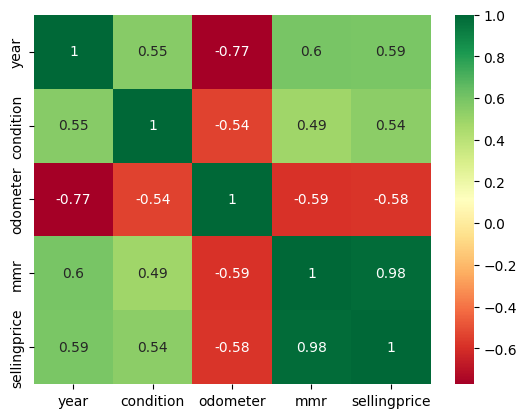

In [9]:
sns.heatmap(
    data=cars.select_dtypes(include="number").corr(),
    annot=True,
    cmap="RdYlGn"
)

It does make sense that year and odometer are negatively correlated. The older the car, the higher the mileage.

It also makes sense that the conditions decreases as the car gets older

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

In [10]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

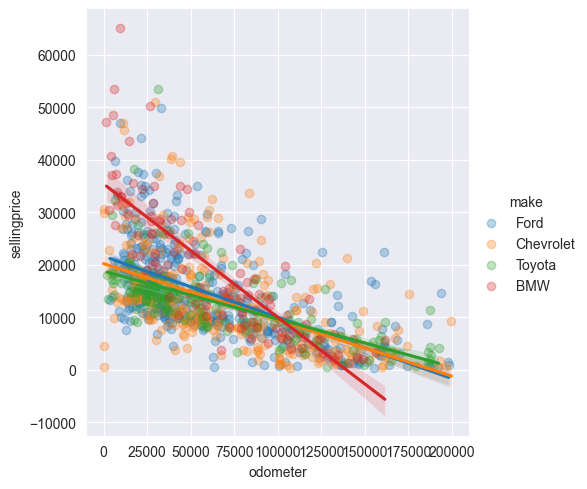

In [106]:
sns.lmplot(
    # data=cars.loc[(cars["make"].isin(brand_list)) & (cars["odometer"] <= 200000) & (cars["sellingprice"] <= 60000)].sample(frac=.02),
    data=cars.query(f"make in {brand_list} and \
                    odometer <= 200000 and \
                    sellingprice <= 150000")
                    .sample(1000),
    x="odometer",
    y="sellingprice",
    hue="make",
    scatter_kws={"alpha": 0.3}
)

In [12]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=np.float64(-0.10686305954841516), intercept=np.float64(20818.28408595647), rvalue=np.float64(-0.5773849819198604), pvalue=np.float64(0.0), stderr=np.float64(0.00021987650761310986), intercept_stderr=np.float64(18.58796228286367))

In [13]:
result = stats.linregress(
        x=cars_regress.loc[cars_regress["make"] == "Ford", "odometer"],
        y=cars_regress.loc[cars_regress["make"] == "Ford", "sellingprice"]
    )

In [14]:
for make in brand_list:
    result = stats.linregress(
        x=cars_regress.loc[cars_regress["make"] == make, "odometer"],
        y=cars_regress.loc[cars_regress["make"] == make, "sellingprice"]
    )
    print(f"{make}: ({result.slope}, {result.intercept})")

Ford: (-0.09953734771818873, 20840.011075886512)
BMW: (-0.2225033042967633, 35567.979744684795)
Toyota: (-0.07594777614361674, 17813.017107685304)
Chevrolet: (-0.08841045962774952, 18705.587357485056)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

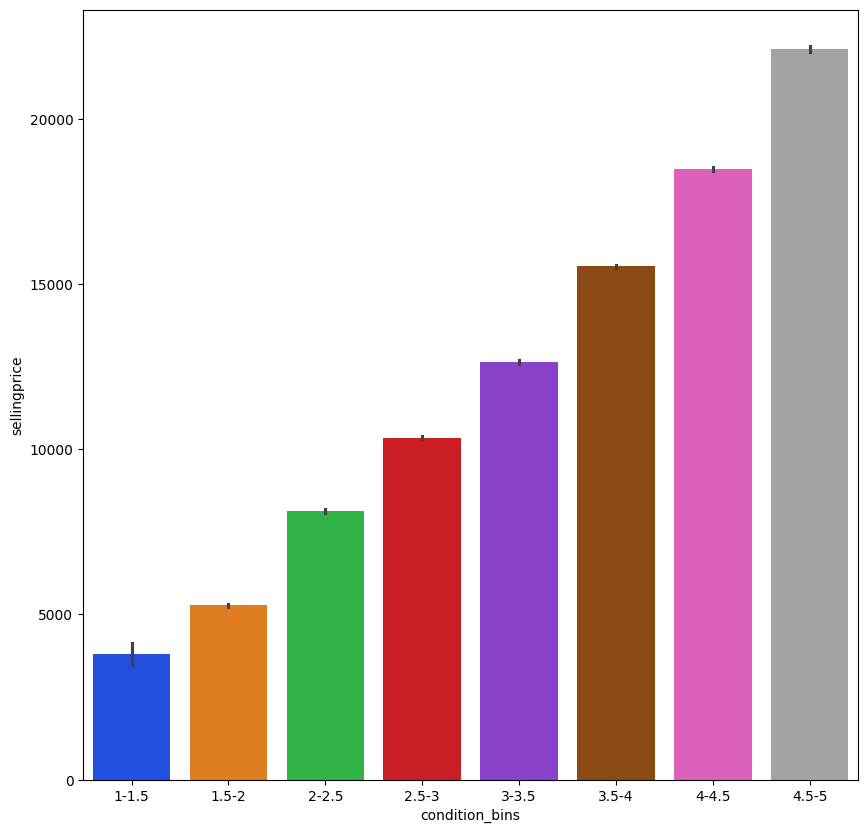

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]

cars["condition_bins"] = pd.cut(cars["condition"],
                                bins=bins,
                                labels=labels)

sns.barplot(
    data = cars,
    x = "condition_bins",
    y = "sellingprice",
    hue = "condition_bins",
    legend = False,
    palette="bright"
)

plt.show()

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [16]:
cars["make"].value_counts()[:10].index

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object', name='make')

In [17]:
top10_brands = cars["make"].value_counts()[:10].index.tolist()

make_pivot = (cars
              .query(f"make in {top10_brands}")
              .pivot_table(index=cars["make"],
                           columns=cars["condition_bins"],
                           aggfunc={"sellingprice": "mean"}))
make_pivot.head()

C:\Users\matwa\AppData\Local\Temp\ipykernel_9780\3629476585.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=cars["make"],


sellingprice                                           \
condition_bins        1-1.5        1.5-2         2-2.5         2.5-3   
make                                                                   
BMW             4326.923077  6848.680865  10478.320029  12795.277669   
Chevrolet       3021.031746  5384.030601   7425.967945  10325.668781   
Chrysler        2354.545455  4301.224656   5367.031437   9077.602013   
Dodge           4094.907407  5299.306603   7127.988641   9840.543230   
Ford            4175.866667  5282.734146   8550.886379  10954.656807   

                                                                        
condition_bins         3-3.5         3.5-4         4-4.5         4.5-5  
make                                                                    
BMW             16397.610281  21911.286118  28791.890310  35902.992693  
Chevrolet       11622.675195  14436.514288  16733.687841  21580.124553  
Chrysler         9247.621069  14813.315207  15212.500990  18388.446281  
Dodge           10517.710952  14051.693213  14893.500000  18400.000000  
Ford            13394.647490  15374.553012  17820.920366  20810.886556

<Axes: xlabel='condition_bins', ylabel='make'>

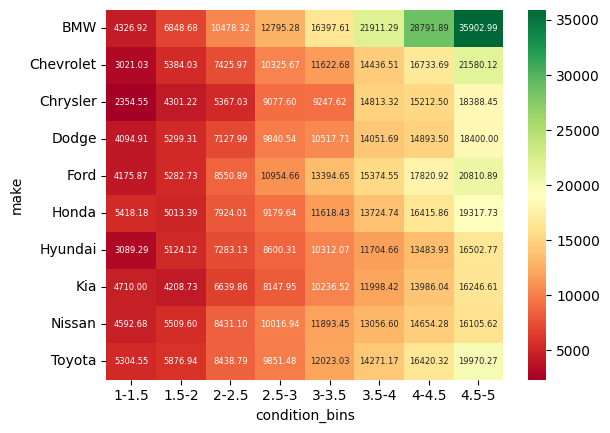

In [18]:
sns.heatmap(
    data=make_pivot.droplevel(0, axis=1),
    annot=True,
    annot_kws={"fontsize": 6},
    cmap="RdYlGn",
    fmt=".2f"
)

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [19]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


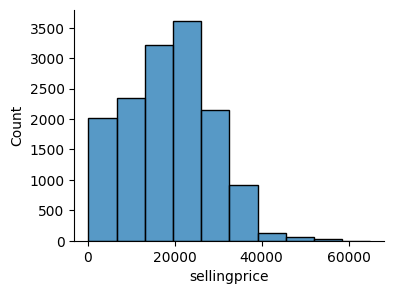

In [20]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.histplot(
    data=f150s,
    x="sellingprice",
    bins=10
)

sns.despine()

* Build a barplot of `sellingprice` by `trim` for the F150s.

C:\Users\matwa\AppData\Local\Temp\ipykernel_9780\375272394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


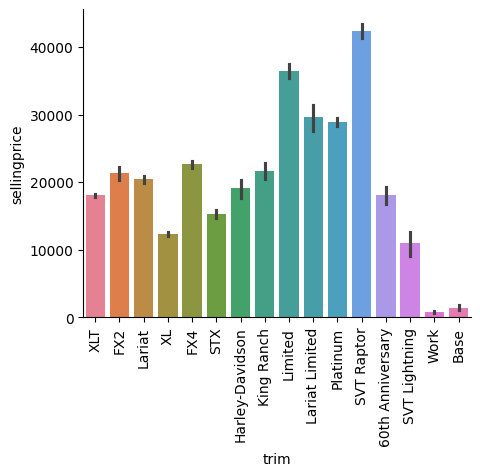

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))

sns.barplot(
    data=f150s,
    x="trim",
    y="sellingprice",
    palette="husl"
)

plt.xticks(rotation=90)

sns.despine()

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

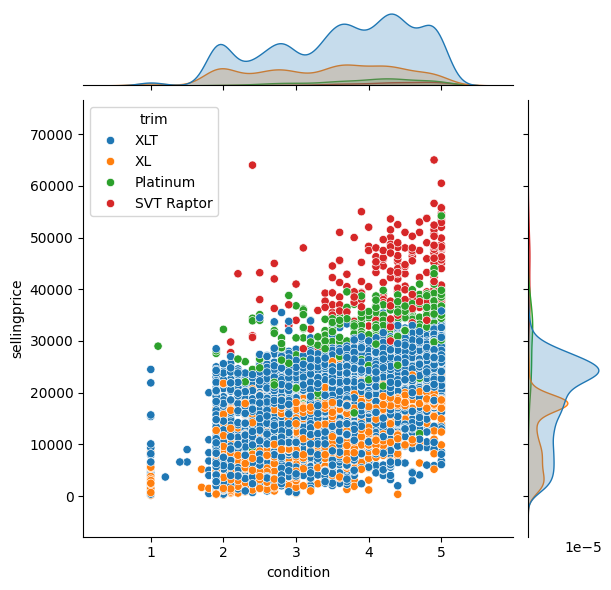

In [22]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

sns.jointplot(
    data=f150s.query(f"trim in {trim_list}"),
    x="condition",
    y="sellingprice",
    hue="trim"
)

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

In [31]:
f150s.loc[:, "diff_to_mmr"] = f150s["sellingprice"] - f150s["mmr"]

C:\Users\matwa\AppData\Local\Temp\ipykernel_9780\2449543259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f150s.loc[:, "diff_to_mmr"] = f150s["sellingprice"] - f150s["mmr"]


C:\Users\matwa\AppData\Local\Temp\ipykernel_9780\745169787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


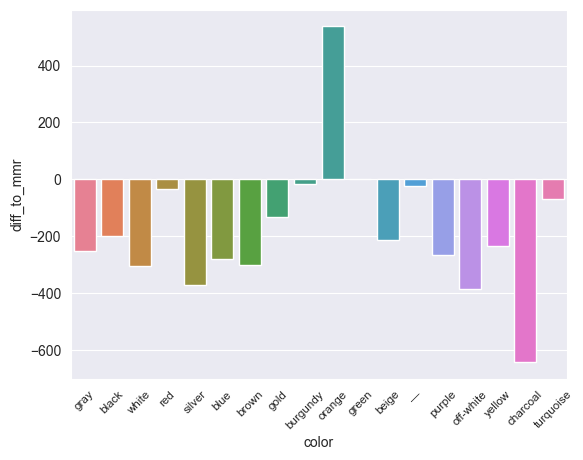

In [36]:
fig, ax = plt.subplots()

sns.set_style("darkgrid")

sns.barplot(
    data=f150s,
    x="color",
    y="diff_to_mmr",
    palette="husl",
    errorbar=None
)

plt.xticks(rotation=45,
           fontsize="small")

plt.show()

In [42]:
f150s_pivot = (f150s
               .query(f"trim in {trim_list} and \
                       color != 'orange'")
                .pivot_table(index=f150s["trim"],
                             columns=f150s["condition_bins"],
                             aggfunc={"sellingprice": "mean"}
                     )
                )

C:\Users\matwa\AppData\Local\Temp\ipykernel_9780\455287429.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index=f150s["trim"],


<Axes: xlabel='condition_bins', ylabel='trim'>

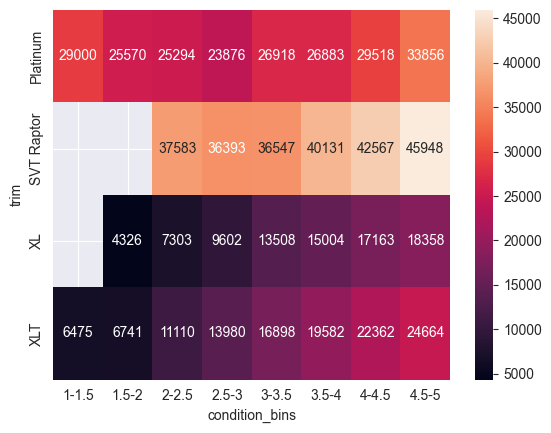

In [50]:
sns.heatmap(
    f150s_pivot.droplevel(0, axis=1),
    annot=True,
    fmt=".0f"
)

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

<AxesSubplot:xlabel='None-condition_bins', ylabel='trim'>

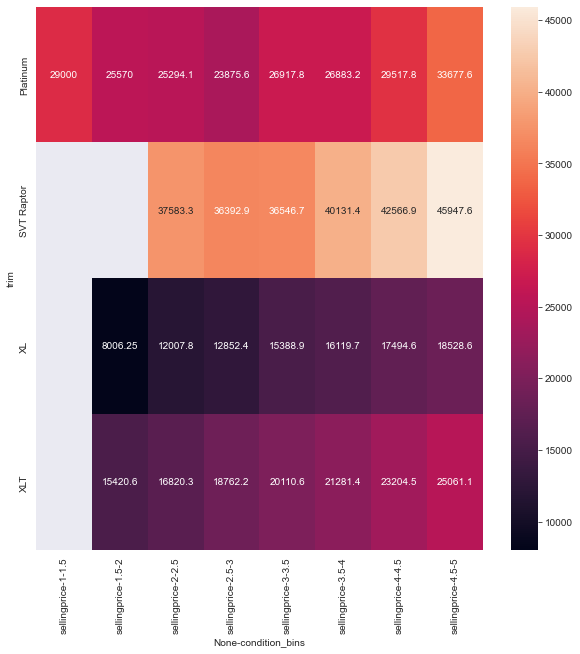

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

In [60]:
f150s_xlt = f150s.query("trim == 'XLT' and condition >= 3.5")

In [62]:
f150s_xlt.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins,diff_to_mmr
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5,500
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4,2500


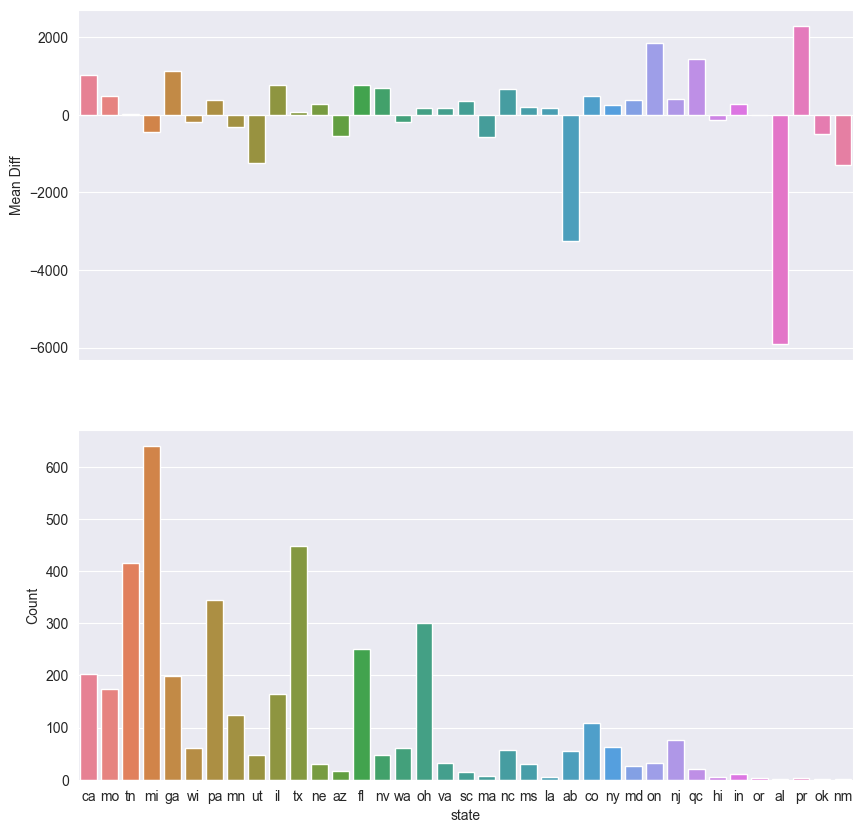

In [75]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)

sns.barplot(
    data=f150s_xlt,
    x="state",
    y="diff_to_mmr",
    hue="state",
    legend=False,
    estimator="mean",
    errorbar=None,
    palette="husl",
    ax=ax[0]
)

ax[0].set_ylabel("Mean Diff")

sns.barplot(
    data=f150s_xlt,
    x="state",
    y="diff_to_mmr",
    hue="state",
    legend=False,
    estimator="count",
    errorbar=None,
    palette="husl",
    ax=ax[1]
)

ax[1].set_xlabel("state")
ax[1].set_ylabel("Count")

plt.show()

* Ok, looks like Utah (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [104]:
f150s_xlt_utah = (f150s_xlt
                  .query("state == 'ut'")
                  .pivot_table(index=f150s_xlt["saledate"],
                               aggfunc={"diff_to_mmr": ["mean", "count"]})
                  )

In [105]:
f150s_xlt_utah

diff_to_mmr             
                                              count         mean
saledate                                                        
Wed Feb 04 2015 03:30:00 GMT-0800 (PST)           2 -1400.000000
Wed Feb 11 2015 03:30:00 GMT-0800 (PST)          12 -1787.500000
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)           9  -377.777778
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)           6  -500.000000
Wed Jan 07 2015 11:30:00 GMT-0800 (PST)           2 -2325.000000
Wed Jan 14 2015 03:30:00 GMT-0800 (PST)           1 -1900.000000
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)           2  -900.000000
Wed Jun 03 2015 04:30:00 GMT-0700 (PDT)           2 -1625.000000
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT)           7 -1957.142857
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)           5  -600.000000